# Introduction to Data Cleaning

## Purpose
This notebook is dedicated to the initial cleaning of the NYC Yellow Taxi trip data, following the initial data acquisition and loading. The primary focus here is to prepare the dataset for further analysis and modeling by addressing common data issues that can affect the quality and performance of data-driven models.

## Objectives
- **Handling Missing Values**: We will identify columns with missing values and determine the best strategies for dealing with them, whether by imputation or removal.
- **Removing Duplicates**: Duplicate records will be identified and removed to ensure the uniqueness of each data entry.
- **Filtering Data**: We will apply filters to remove outliers or erroneous data that do not meet the logical constraints of our analysis.
- **Data Type Conversions**: Necessary data type changes will be made to facilitate easier analysis and modeling. For example, converting timestamps from strings to datetime objects, or categorizing numerical codes into categorical data types.

## Context
This notebook serves as an extension of the Data Loading notebook. It assumes that the data loading is straightforward and primarily focuses on cleaning aspects to enhance data quality for subsequent exploratory data analysis and predictive modeling. By the end of this process, the dataset will be cleaner, making it more suitable for accurate and efficient analysis.

## Expected Outcomes
Upon completion of this notebook, the data will be in a cleaner state, with improved accuracy and usability for further stages of the project. This will facilitate more reliable insights and better predictive performance in subsequent modeling tasks.


# Imports and Installation Packages

Below is the necessary instalation packages needed to run this notebook.

In [1]:
pip install pandas pyarrow matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from pandas.tseries.holiday import USFederalHolidayCalendar as calander

# Data Loading

In [3]:
# We load our combined dataset from our first notebook for whole year of 2023 

df = pd.read_parquet("combined_yellow_tripdata_2023.parquet")


We need to make sure that our data contains only values from 2023

In [4]:
df = df[(df['tpep_pickup_datetime'].dt.year == 2023) & (df['tpep_dropoff_datetime'].dt.year == 2023)]

In [6]:
len(df)

38309599

we can see that some records were dropped as they were not within 2023

In [6]:
df.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.00,0.97,1.00,N,161,141,2,9.30,1.00,0.50,0.00,0.00,1.00,14.30,2.50,0.00,NaN


# Dataset Initial Look

In the section below we take a look at the overall dataset for 2023, look at the null values and determine the next steps for cleaning, preprocessing and feature engineering.

## Feature Description Based on Data Dictionary:
Below is the features description based on official documentation from NYC taxi and limo services:

| Field Name                  | Description |
|-----------------------------|-------------|
| `VendorID`                  | A code indicating the TPEP provider that provided the record. <br> 1 = Creative Mobile Technologies, LLC; <br> 2 = VeriFone Inc. |
| `tpep_pickup_datetime`      | The date and time when the meter was engaged. |
| `tpep_dropoff_datetime`     | The date and time when the meter was disengaged. |
| `Trip_distance`             | The elapsed trip distance in miles reported by the taximeter. |
| `PULocationID`              | TLC Taxi Zone in which the taximeter was engaged. |
| `DOLocationID`              | TLC Taxi Zone in which the taximeter was disengaged. |
| `Passenger_count`           | The number of passengers in the vehicle. This is a driver-entered value. |
| `RateCodeID`                | The final rate code in effect at the end of the trip. <br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br> 4 = Nassau or Westchester <br> 5 = Negotiated fare <br> 6 = Group ride |
| `Store_and_fwd_flag`        | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server. <br> Y = store and forward trip <br> N = not a store and forward trip |
| `Payment_type`              | A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip |
| `Fare_amount`               | The time-and-distance fare calculated by the meter. |
| `Extra`                     | Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges. |
| `MTA_tax`                   | 0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| `Improvement_surcharge`     | 0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| `Tip_amount`                | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| `Tolls_amount`              | Total amount of all tolls paid in trip. |
| `Total_amount`              | The total amount charged to passengers. Does not include cash tips. |
| `Congestion_Surcharge`      | Total amount collected in trip for NYS congestion surcharge. |
| `Airport_fee`               | 1.25 for pick up only at LaGuardia and John F. Kennedy Airports. |


### Descriptive Stats

In [7]:
# Assuming 'df' is your DataFrame
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,38309599.00,38309599,38309599,37000277.00,38309599.00,37000277.00,38309599.00,38309599.00,38309599.00,38309599.00,38309599.00,38309599.00,38309599.00,38309599.00,38309599.00,38309599.00,37000277.00,2994985.00,34005292.00
mean,1.74,2023-07-02 22:58:57.283235,2023-07-02 23:16:24.373680,1.37,4.09,1.64,165.18,163.95,1.18,19.52,1.56,0.49,3.52,0.59,0.98,28.46,2.26,0.11,0.14
min,1.00,2023-01-01 00:00:00,2023-01-01 00:03:28,0.00,0.00,1.00,1.00,1.00,0.00,-959.90,-39.17,-0.50,-411.00,-91.30,-1.00,-982.95,-2.50,-1.25,-1.75
25%,1.00,2023-04-02 18:24:44,2023-04-02 18:42:34,1.00,1.04,1.00,132.00,113.00,1.00,9.30,0.00,0.50,1.00,0.00,1.00,15.95,2.50,0.00,0.00
50%,2.00,2023-06-27 18:42:08,2023-06-27 18:57:53,1.00,1.79,1.00,162.00,162.00,1.00,13.50,1.00,0.50,2.80,0.00,1.00,21.00,2.50,0.00,0.00
75%,2.00,2023-10-06 21:51:32,2023-10-06 22:07:37.500000,1.00,3.40,1.00,234.00,234.00,1.00,21.90,2.50,0.50,4.41,0.00,1.00,30.72,2.50,0.00,0.00
max,6.00,2023-12-31 23:57:46,2023-12-31 23:59:56,9.00,345729.44,99.00,265.00,265.00,5.00,386983.63,10002.50,53.16,4174.00,665.56,1.00,386987.63,2.75,1.25,1.75
std,0.44,NaN,NaN,0.89,241.25,7.43,64.00,69.86,0.56,75.73,2.45,0.11,4.15,2.20,0.20,77.13,0.80,0.36,0.48


Here's a structured markdown description and explanation of the descriptive statistics for your dataset, formatted appropriately for inclusion in your project notebook:

---

## Descriptive Statistics Overview

This section provides a detailed summary of the data related to NYC taxi trips. Below is the interpretation of each column's statistics:

### General Statistics

- **Count**: Indicates the total number of non-missing entries for each feature.
- **Mean**: Represents the average value across all entries for each feature.
- **Std (Standard Deviation)**: Shows the amount of variation or dispersion from the average.
- **Min (Minimum)**: The smallest value found in each feature.
- **25% (1st Quartile)**: A quarter of the entries are below this value.
- **50% (Median)**: The middle value when the data is ordered from least to greatest.
- **75% (3rd Quartile)**: Three-quarters of the entries are below this value.
- **Max (Maximum)**: The largest value found in each feature.

### Feature-Specific Statistics

- **VendorID**:
  - Values range from 1 to 6, indicating different TPEP providers.
  - Most trips are evenly split between the providers.

- **Passenger Count**:
  - The number of passengers ranges from 0 to 9 per trip.
  - The majority of trips carry just one passenger.

- **Trip Distance**:
  - Distances range from 0 to 345,729.44 (likely indicating outliers or data errors).
  - The average trip is approximately 4.09 miles, though the median value is lower at 1.79 miles, which suggests that there are some very long trips skewing the average higher.

- **RatecodeID**:
  - A majority of trips use the standard rate (code 1), with some outliers using code as high as 99 (which may indicate special rates or data errors).

- **PULocationID** and **DOLocationID** (Pickup and Dropoff Location IDs)**:
  - Both feature IDs range from 1 to 265, which corresponds to pre-defined taxi zones in NYC.
  - The average pickup and dropoff locations are around the mid-160s, but this wide range suggests that taxis service a broad area of the city.

- **Payment Type**:
  - Ranges from 0 to 5, indicating different forms of payment.
  - Most trips are paid with type 1, which based on our data dictionary indicate payments made by credit card.

- **Fare Amount**:
  - Fares range from -959.90 to 386,983.63, showing that there are likely errors or outliers in the data as negative fares and excessively high fares are not feasible.

- **Extra Charges** (like late-night or rush hour fees)**:
  - Values range from -39.17 to 10,002.50, also indicating potential data entry errors or outliers.

- **MTA Tax**:
  - Ranges from -0.50 to 53.16, with most trips showing the standard MTA tax of 0.50.

- **Tip Amount**:
  - Tips range from -411 to 4,174, with a mean tip of approximately 3.52.

- **Tolls Amount**:
  - Toll amounts have a wide range from -91.30 to 665.56, again suggesting some outliers or errors.

- **Improvement Surcharge**:
  - This has a smaller range of values, mostly being the standard surcharge of 1.00, but with a minimum indicating an erroneous entry at -1.00.

- **Total Amount**:
  - The total amount paid, including all surcharges and fees, ranges from -982.95 to 386,987.63, which includes potential outliers or incorrect charges.

- **Congestion Surcharge**:
  - Reflects additional charges during peak times in congested areas, with most trips incurring the standard congestion surcharge of 2.50.

- **Airport Fee**:
  - Not all entries have airport fees, but for those that do, they range from -1.75 to 1.75, with negative values indicating potential data errors.

### Observations and Actionable Insights

The dataset contains some inconsistencies and potential errors, particularly in `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, and `total_amount`. Before using this data for further analysis or model training, it's essential to perform data cleaning to remove or correct these outliers and erroneous entries. This will ensure the integrity and reliability of any conclusions drawn or predictive models developed from this dataset.


# Data Cleaning 

as described above our data has significant outliers, negative and 0 values in order to be able to proceed with feature enginnering and modeling we need to adress this issues. 

### Categorical Columns Overview and Filtering 

In [5]:
# List of categorical columns based on your data dictionary
categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type','PULocationID','DOLocationID','payment_type']

# Print unique values in each categorical column
for column in categorical_columns:
    # Ensure the column is treated as categorical
    df[column] = df[column].astype('category')
    
    # Print unique values
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in VendorID: [2, 1, 6]
Categories (3, int64): [1, 2, 6]
Unique values in RatecodeID: [1.00, 2.00, 4.00, 99.00, 5.00, 3.00, 6.00, NaN]
Categories (7, float64): [1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 99.00]
Unique values in store_and_fwd_flag: ['N', 'Y', NaN]
Categories (2, object): ['N', 'Y']
Unique values in payment_type: [2, 1, 4, 3, 0, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]
Unique values in PULocationID: [161, 43, 48, 138, 107, ..., 59, 176, 84, 27, 110]
Length: 263
Categories (263, int64): [1, 2, 3, 4, ..., 262, 263, 264, 265]
Unique values in DOLocationID: [141, 237, 238, 7, 79, ..., 99, 84, 204, 105, 110]
Length: 262
Categories (262, int64): [1, 2, 3, 4, ..., 262, 263, 264, 265]
Unique values in payment_type: [2, 1, 4, 3, 0, 5]
Categories (6, int64): [0, 1, 2, 3, 4, 5]


### VendorID

In [6]:
vendor_id_6_rows = df[df['VendorID'] == 6]
vendor_id_6_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
5903916,6,2023-02-01 00:02:09,2023-02-01 00:02:01,NaN,5.54,NaN,NaN,265,91,0,23.92,0.00,0.50,0.00,0.00,0.30,24.72,NaN,NaN,NaN
5903920,6,2023-02-01 00:02:05,2023-02-01 01:02:43,NaN,5.10,NaN,NaN,265,76,0,20.89,0.00,0.50,0.00,0.00,0.30,21.69,NaN,NaN,NaN
5904000,6,2023-02-01 05:02:31,2023-02-01 06:02:14,NaN,10.44,NaN,NaN,265,209,0,38.62,0.00,0.50,0.00,0.00,0.30,39.42,NaN,NaN,NaN
5904017,6,2023-02-01 05:02:53,2023-02-01 06:02:48,NaN,13.20,NaN,NaN,265,226,0,41.91,0.00,0.50,0.00,0.00,0.30,42.71,NaN,NaN,NaN
5904052,6,2023-02-01 06:02:39,2023-02-01 07:02:08,NaN,11.44,NaN,NaN,265,162,0,41.24,0.00,0.50,0.00,0.00,0.30,42.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304229,6,2023-12-31 02:12:25,2023-12-31 02:12:16,NaN,0.44,NaN,NaN,265,83,0,15.20,0.00,0.50,0.00,0.00,0.30,16.00,NaN,NaN,NaN
38304844,6,2023-12-31 09:12:17,2023-12-31 09:12:15,NaN,21.23,NaN,NaN,265,86,0,52.04,0.00,0.50,0.00,0.00,0.30,52.84,NaN,NaN,NaN
38305845,6,2023-12-31 17:12:31,2023-12-31 17:12:47,NaN,3.05,NaN,NaN,265,188,0,18.01,0.00,0.50,0.00,0.00,0.30,18.81,NaN,NaN,NaN
38306106,6,2023-12-31 18:12:40,2023-12-31 18:12:21,NaN,4.64,NaN,NaN,265,63,0,20.85,0.00,0.50,0.00,0.00,0.30,21.65,NaN,NaN,NaN


As we can see vendor ID has 8668 rosw with value of 6 which is not within our pre-defined categories, as this number is small relative to our dataset size we can remove all rows with vendorID of 6.

In [7]:
df = df[df['VendorID'] != 6]

### RateCodeID

Typical ratecode ids based on our dictionary are from 1-6 we see the value of 99 in our categories, based on our research 99 used to be part of this category and data dictionary is not including this type means it was either removed or tehre was an error when compiling data dictionary or for some other reaseon it remains, generally 99 meant missing or unknown we will keep it for our purpouses. 

This is ratecode descriptions based on older data dict: 
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
99 = Null/unknown

In [8]:
rateCode_99 = df[df['RatecodeID'] == 99]

In [9]:
rateCode_99

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
329,1,2023-01-01 00:12:16,2023-01-01 00:26:14,1.00,4.40,99.00,N,74,248,1,24.50,0.00,0.50,0.00,6.55,1.00,32.55,0.00,0.00,NaN
4067,1,2023-01-01 00:34:52,2023-01-01 00:44:07,1.00,1.00,99.00,N,42,74,1,12.20,0.00,0.50,0.00,0.00,1.00,13.70,0.00,0.00,NaN
8744,1,2023-01-01 01:17:50,2023-01-01 02:02:32,1.00,11.50,99.00,N,188,219,1,45.50,0.00,0.50,0.00,0.00,1.00,47.00,0.00,0.00,NaN
9254,1,2023-01-01 01:51:10,2023-01-01 02:19:45,1.00,0.00,99.00,N,74,77,1,41.20,0.00,0.50,0.00,6.55,1.00,49.25,0.00,0.00,NaN
12769,1,2023-01-01 02:03:24,2023-01-01 03:04:37,1.00,22.00,99.00,N,86,5,1,67.20,0.00,0.50,0.00,9.00,1.00,77.70,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38122163,1,2023-12-31 21:26:40,2023-12-31 22:01:32,1.00,0.10,99.00,N,15,15,1,20.50,0.00,0.50,0.00,0.00,1.00,22.00,0.00,NaN,0.00
38122451,1,2023-12-31 21:09:14,2023-12-31 21:10:37,1.00,0.10,99.00,N,169,169,1,23.50,0.00,0.50,0.00,0.00,1.00,25.00,0.00,NaN,0.00
38122452,1,2023-12-31 21:10:44,2023-12-31 21:36:05,1.00,0.00,99.00,N,212,212,1,22.50,0.00,0.50,0.00,0.00,1.00,24.00,0.00,NaN,0.00
38122453,1,2023-12-31 21:47:47,2023-12-31 21:59:59,1.00,0.20,99.00,N,159,159,1,30.50,0.00,0.50,0.00,0.00,1.00,32.00,0.00,NaN,0.00


There is 213477 counts of ratecode 99 which means for thir trips the ratecode is unknown.

### Payment Type 

for the current year dictionary we see that the values start from [1, 2, 4, 3, 5, 0] and based on current year data dictionary the atcual results do not correlate as the ctaegories are from 1 to 6, however based on previous years data dictionaries the categories were : 
"0= Flex Fare trip
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip"

We can assume that this is still relavant and trips with 0 are of flex fare and all voided trips were removed from the dataset 

In [10]:
zero_payment_types = df[df['payment_type'] == 0]
print("Analysis of records with payment_type 0:")
zero_payment_types.describe(include='all')  # Adjust to focus on relevant fields

Analysis of records with payment_type 0:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,1300654.00,1300654,1300654,0.00,1300654.00,0,0,1300654.00,1300654.00,1300654.00,1300654.00,1300654.00,1300654.00,1300654.00,1300654.00,1300654.00,1300654.00,0.00,0.00,0.00
unique,2.00,NaN,NaN,NaN,NaN,0,0,258.00,259.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2.00,NaN,NaN,NaN,NaN,NaN,NaN,236.00,138.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,791931.00,NaN,NaN,NaN,NaN,NaN,NaN,48221.00,45949.00,1300654.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2023-07-29 15:34:57.761515,2023-07-29 15:54:04.935265,NaN,18.53,NaN,NaN,NaN,NaN,NaN,22.23,0.18,0.50,2.79,0.60,1.00,29.59,NaN,NaN,NaN
min,NaN,2023-01-01 00:00:00,2023-01-01 00:08:00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,-184.76,-39.17,-0.50,-10.76,0.00,0.00,-154.94,NaN,NaN,NaN
25%,NaN,2023-05-01 18:22:05.250000,2023-05-01 18:43:49.250000,NaN,0.61,NaN,NaN,NaN,NaN,NaN,12.83,0.00,0.50,0.00,0.00,1.00,18.91,NaN,NaN,NaN
50%,NaN,2023-08-15 17:36:23.500000,2023-08-15 17:51:39.500000,NaN,2.10,NaN,NaN,NaN,NaN,NaN,18.54,0.00,0.50,2.02,0.00,1.00,24.70,NaN,NaN,NaN
75%,NaN,2023-10-29 03:09:43.500000,2023-10-29 03:26:35,NaN,4.40,NaN,NaN,NaN,NaN,NaN,27.56,0.00,0.50,4.12,0.00,1.00,34.62,NaN,NaN,NaN
max,NaN,2023-12-31 23:53:49,2023-12-31 23:59:53,NaN,345729.44,NaN,NaN,NaN,NaN,NaN,6339.00,20.80,42.17,604.09,82.75,1.00,6339.00,NaN,NaN,NaN




### Payment Type Analysis

In our current dataset, the observed `payment_type` values are [1, 2, 4, 3, 5, 0], which do not directly align with the categories specified in this year's data dictionary, which range from 1 to 6. Notably, the category '6' (Voided trip) is absent, and '0' appears as an additional category not documented for this year.

From historical data dictionaries, the `payment_type` categories have been listed as:
- 0 = Flex Fare trip
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

Given the discrepancies, a plausible explanation is that the coding has remained consistent with previous years where '0' represented "Flex Fare trips." The absence of '6' in the dataset suggests that all "Voided trips" might have been excluded from the current dataset, potentially during pre-processing stages or as a result of data governance policies.

#### Implications for Data Analysis
- **Assumption Validation**: We will treat '0' as "Flex Fare trip" for the purpose of our analyses. This assumption is based on historical categorization, and should future data dictionaries or additional information from the data provider suggest otherwise, revisions may be necessary.
- **Handling Absent Categories**: The lack of '6' in the dataset should be noted, and any analysis on `payment_type` should account for the potential non-inclusion of voided trips.
- **Data Cleaning and Usage**: With these assumptions, data cleaning steps will incorporate '0' as a valid category, and analysis involving payment types will reflect these categories accurately.


### Location IDs

NYC taxi zones have their own unique code from 1 to 265 we need to validate that pickup and drop off locations correspond to this IDs.

In [11]:
max_location_id = 265  # Maximum ID expected

# Convert categorical to numeric temporarily for the comparison
df = df[(df['PULocationID'].astype(int).between(1, max_location_id)) &
        (df['DOLocationID'].astype(int).between(1, max_location_id))]


In [12]:
# Assuming df is loaded or at some preprocessing step
df['PULocationID'] = df['PULocationID'].astype(int)
df['DOLocationID'] = df['DOLocationID'].astype(int)

# Now your original condition will work without modification
max_location_id = 265  # Maximum ID expected
df = df[(df['PULocationID'].between(1, max_location_id)) &
        (df['DOLocationID'].between(1, max_location_id))]


### Removing duplicates
Before moving forward with further data clening we need to ensure that our dataset does not contain any duplicate values

To ensure data entegrity it is also important to remove any dulicate values

In [13]:
df.duplicated().sum()


2

In [14]:
df.drop_duplicates(inplace= True)

In [15]:
df.duplicated().sum()

0

There might be duplicate values that have the same date time, passenger count but negative fares this is based on our domain knowledge, for this type of records we observed that the total amount is negative so duplicated value has negative values, this could be due to voided trip or returned amount or data collection error. In order to ensure that our dataset is clean we will remove the negative values and keep records higher than 0.

In [16]:
duplicate_value = df[df.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicate_value

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
132,2,2023-01-01 00:28:29,2023-01-01 00:31:03,1.00,0.42,1.00,N,233,229,4,-5.10,-1.00,-0.50,0.00,0.00,-1.00,-10.10,-2.50,0.00,NaN
133,2,2023-01-01 00:28:29,2023-01-01 00:31:03,1.00,0.42,1.00,N,233,229,4,5.10,1.00,0.50,0.00,0.00,1.00,10.10,2.50,0.00,NaN
263,2,2023-01-01 00:20:18,2023-01-01 00:27:56,2.00,1.19,1.00,N,142,50,4,-9.30,-1.00,-0.50,0.00,0.00,-1.00,-14.30,-2.50,0.00,NaN
264,2,2023-01-01 00:20:18,2023-01-01 00:27:56,2.00,1.19,1.00,N,142,50,4,9.30,1.00,0.50,0.00,0.00,1.00,14.30,2.50,0.00,NaN
324,2,2023-01-01 00:52:22,2023-01-01 01:14:03,1.00,4.89,1.00,N,238,167,4,-25.40,-1.00,-0.50,0.00,0.00,-1.00,-30.40,-2.50,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38130138,2,2023-12-31 23:11:52,2023-12-31 23:20:02,1.00,1.44,1.00,N,41,151,3,10.70,1.00,0.50,0.00,0.00,1.00,13.20,0.00,NaN,0.00
38130167,2,2023-12-31 23:31:55,2023-12-31 23:57:24,1.00,0.63,1.00,N,186,246,3,-19.10,-1.00,-0.50,0.00,0.00,-1.00,-24.10,-2.50,NaN,0.00
38130168,2,2023-12-31 23:31:55,2023-12-31 23:57:24,1.00,0.63,1.00,N,186,246,3,19.10,1.00,0.50,0.00,0.00,1.00,24.10,2.50,NaN,0.00
38130180,2,2023-12-31 23:00:36,2023-12-31 23:00:43,1.00,0.00,1.00,N,90,90,4,-3.00,-1.00,-0.50,0.00,0.00,-1.00,-8.00,-2.50,NaN,0.00


In [17]:

# Correct filtering to only apply to 'duplicate_value' DataFrame
dup_negative_val = duplicate_value[duplicate_value['fare_amount'] < 0]
dup_negative_val  # To verify what's being filtered
len(dup_negative_val)


332042

In [18]:
# Dropping negative fare duplicates safely using indices
if not dup_negative_val.empty:
    df.drop(dup_negative_val.index, inplace=True)


In [19]:
# Check again to confirm no duplicates remain with the specified conditions
remaining_duplicates = df[df.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
print(f"Remaining duplicates: {len(remaining_duplicates)}")


Remaining duplicates: 3617


In [20]:
# Display some of the remaining duplicates to understand their nature
df[df.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)].head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
76200,2,2023-01-02 04:23:28,2023-01-02 04:23:58,3.00,0.02,3.00,N,137,137,2,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,0.00,NaN
76201,2,2023-01-02 04:23:28,2023-01-02 04:23:58,3.00,0.02,3.00,N,137,137,2,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN
76507,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.00,17.07,3.00,N,142,1,2,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,0.00,NaN
76508,2,2023-01-02 05:12:19,2023-01-02 05:41:45,1.00,17.07,3.00,N,142,1,2,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN
76951,2,2023-01-02 06:32:52,2023-01-02 07:05:44,1.00,16.71,2.00,N,132,50,2,0.00,0.00,-0.50,0.00,0.00,-1.00,-5.25,-2.50,-1.25,NaN


In [21]:
df = df.drop_duplicates(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)


In [23]:
remaining_duplicates = df[df.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
print(f"Remaining duplicates: {len(remaining_duplicates)}")

Remaining duplicates: 0


## Negative Values 

In some columns we have negative values that do not make sense thus to ensure data integrity we will kepp only columns with positive values for such features.

In [24]:
# Create a new DataFrame for the results with only the necessary columns
results = pd.DataFrame({
    'feature': df.columns,
    'data_type': df.dtypes
})

# Select only numeric columns directly using select_dtypes, avoiding the TypeError
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate the percentage of negative values for numeric columns
neg_values_percent = {col: (df[col] < 0).mean() * 100 for col in numeric_columns}

# Add this data to the results DataFrame
results['neg_value(%)'] = results['feature'].map(neg_values_percent).fillna(0).round(3)

# Display the results
print(results)



                                     feature       data_type  neg_value(%)
VendorID                            VendorID        category          0.00
tpep_pickup_datetime    tpep_pickup_datetime  datetime64[us]          0.00
tpep_dropoff_datetime  tpep_dropoff_datetime  datetime64[us]          0.00
passenger_count              passenger_count         float64          0.00
trip_distance                  trip_distance         float64          0.00
RatecodeID                        RatecodeID        category          0.00
store_and_fwd_flag        store_and_fwd_flag        category          0.00
PULocationID                    PULocationID           int64          0.00
DOLocationID                    DOLocationID           int64          0.00
payment_type                    payment_type        category          0.00
fare_amount                      fare_amount         float64          0.13
extra                                  extra         float64          0.06
mta_tax                  

In [25]:
# Identify and convert negative values to their absolute values across all numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    # Check if any value in the column is less than 0
    if (df[col] < 0).any():
        print(f"Converting negative values in {col} to positive...")
        df[col] = df[col].abs()


Converting negative values in fare_amount to positive...
Converting negative values in extra to positive...
Converting negative values in mta_tax to positive...
Converting negative values in tip_amount to positive...
Converting negative values in tolls_amount to positive...
Converting negative values in improvement_surcharge to positive...
Converting negative values in total_amount to positive...
Converting negative values in congestion_surcharge to positive...
Converting negative values in airport_fee to positive...
Converting negative values in Airport_fee to positive...


In [26]:
neg_values_percent = {col: (df[col] < 0).mean() * 100 for col in numeric_columns}

In [27]:
neg_values_percent 

{'passenger_count': 0.0,
 'trip_distance': 0.0,
 'PULocationID': 0.0,
 'DOLocationID': 0.0,
 'fare_amount': 0.0,
 'extra': 0.0,
 'mta_tax': 0.0,
 'tip_amount': 0.0,
 'tolls_amount': 0.0,
 'improvement_surcharge': 0.0,
 'total_amount': 0.0,
 'congestion_surcharge': 0.0,
 'airport_fee': 0.0,
 'Airport_fee': 0.0}

## 0 Values Handling

In some categorical columns 0 is a must but for columns like trip distance or passenger count 0-s must be adressed accordingly.

In [28]:
# Create a DataFrame with the necessary information about each column
results = pd.DataFrame({
    'feature': df.columns,
    'data_type': df.dtypes,
    '0_value(%)': 0.0  # Initialize with 0.0 for all columns
})

# Filter and calculate only for numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    # Calculate the percentage of zero values directly using vectorized operations
    zero_percentage = (df[col] == 0).mean() * 100
    results.loc[results['feature'] == col, '0_value(%)'] = zero_percentage

# Round the results for better readability
results = results.round(3)

# Print the DataFrame to see the results
print(results)


                                     feature       data_type  0_value(%)
VendorID                            VendorID        category        0.00
tpep_pickup_datetime    tpep_pickup_datetime  datetime64[us]        0.00
tpep_dropoff_datetime  tpep_dropoff_datetime  datetime64[us]        0.00
passenger_count              passenger_count         float64        1.53
trip_distance                  trip_distance         float64        1.94
RatecodeID                        RatecodeID        category        0.00
store_and_fwd_flag        store_and_fwd_flag        category        0.00
PULocationID                    PULocationID           int64        0.00
DOLocationID                    DOLocationID           int64        0.00
payment_type                    payment_type        category        0.00
fare_amount                      fare_amount         float64        0.02
extra                                  extra         float64       40.13
mta_tax                              mta_tax       

Okay we see that we have 0 values in multiple columns for some this is okay but for some this needs to be adressed: 

Passanger count and trip distance cannot be 0 trip without passenger or with 0 distance is void thus we need to fill this with median number or remove the rows. 

fare amount cannot also be 0

extra, mta_tax,tip_amount, tolls_amount,imrpovement surcharge, congestion surcharge, and airport fees can be 0's as they depend on specific conditions being met and if they are 0 it might mean that this conditions were not met.


Passenger Count (1.53%) and Trip Distance (1.98%): These percentages are relatively low. Imputing these zeros with median values would retain more data for analysis without significantly distorting the distribution. Removing these rows is also a viable option because the percentage is small and may not drastically reduce the data size.
Fare Amount (0.03%): Since this is extremely low, removing these rows or replacing them with the median/mean would be appropriate and would not significantly impact the dataset.
Extra (40.23%) and Tip Amount (23.03%): Given the high percentages, it's plausible these zeros are valid entries reflecting trips where no extras were charged or no tip was given. Removing or altering these would significantly alter the data's structure and potentially bias any analysis.
Tolls Amount (91.83%) and Airport Fee (80.77%): The extremely high percentages suggest that these zeros reflect the reality of most trips not incurring tolls or airport fees. Imputing or removing these would be inappropriate and could lead to severe data misrepresentation.
Congestion Surcharge (7.39%) and Improvement Surcharge (0.04%): Depending on the context, zeros in these columns might be normal. Given the lower percentages, reviewing the context of these charges would be essential before deciding.

In [29]:
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['passenger_count']>0]

In [30]:
len(df)

35649929


### Null Values 

Below we will look at columns with null values and devise a strategy based on our knowledge and best practices on how to handle them.

In [31]:
# Count of null values per column
print(df.isnull().sum())


VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count                 0
trip_distance                   0
RatecodeID                      0
store_and_fwd_flag              0
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge            0
airport_fee              32762828
Airport_fee               2887101
dtype: int64


After cleaning and dropping duplicates and removing negative and 0 values we see that only null values retained are in the airport fields, which is logical as not all trips were airport trips we can adjust this fields by adding 0 s to the trips that were not airport ones.

## Handling Null Values

### Airport Fees

Airports fees can have missing values the number of missinbg values being this large indicates that tehre were not many airport trips the fact that we have 2 columns with airport fees populated and with diffrent number of missing entries indicates issues with data processing, based on our literature review we know thta this field was added to data collection around 2022 and is relatively new so there might be issues with data fetching or processing for this field as well thus we have 2 features. 

As we know $1.25 for pick up only at LaGuardia and John F. Kennedy Airports thus based on our descriptive statistics we know that airport fee has min max of 1.25 which indicates that this is the rate for JFK and laguardia and that 1.75 for other Airports.


In [32]:


# If after your investigation you decide to keep both columns, you may want to rename them for clarity
#$1.25 for pick up only at LaGuardia and John F. Kennedy Airports based on our descirptive stats we decided
#to rename our columns accordingly 

# Renaming columns for clarity
df.rename(columns={
    'Airport_fee': 'General_Airport_Fee',  # This seems to be a more general or incorrectly applied fee.
    'airport_fee': 'JFK_LGA_Pickup_Fee'  # This is clearly the specific fee for JFK and LaGuardia as described.
}, inplace=True)

# Print new column names to confirm
print("Updated column names:")
print(df.columns)



Updated column names:
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'JFK_LGA_Pickup_Fee',
       'General_Airport_Fee'],
      dtype='object')


In [33]:
# Handle 'Airport_fee' based on domain knowledge, for example, setting missing values to 0.0
df['General_Airport_Fee'].fillna(0.0, inplace=True)
df['JFK_LGA_Pickup_Fee'].fillna(0.0, inplace=True)

/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_5622/2178874599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['General_Airport_Fee'].fillna(0.0, inplace=True)
/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_5622/2178874599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [34]:
print(df['General_Airport_Fee'].describe())
print(df['JFK_LGA_Pickup_Fee'].describe())

count   35649929.00
mean           0.14
std            0.46
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            1.75
Name: General_Airport_Fee, dtype: float64
count   35649929.00
mean           0.01
std            0.11
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            1.25
Name: JFK_LGA_Pickup_Fee, dtype: float64


now we see that there are no missing values in airport fees and we know better understand the 2 columns what they stand for. We can also check if the applied rates are correct so where 0 is for one type of airport fee the other is fille dor also 0.

##### Check again for any prevailing null values 

In [35]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
JFK_LGA_Pickup_Fee       0
General_Airport_Fee      0
dtype: int64

# Formatting & Outliers Handling

### Understanding and Working with Data Types in the dataset

Below we look at the data types for each column in the dataset and if based on our knowledge and data dictionary provided by NYC taxi services we see discrepancies in the data type and feature we will adjust accordingly.

In [36]:
# Check the data types
print(df.dtypes)


VendorID                       category
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
JFK_LGA_Pickup_Fee              float64
General_Airport_Fee             float64
dtype: object


For categorical data types that we know are categorical from our data dictionary we can convert the numeric data types to categorical for modeling and feature engineering purpouses. 

Categorical Data is: 

* RatecodeID
* store_and_fwd_flag
* payment_type

In [37]:
# Convert categorical columns to 'category' data types
categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Confirm changes
df.dtypes


VendorID                       category
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
JFK_LGA_Pickup_Fee              float64
General_Airport_Fee             float64
dtype: object

* Convert passenger_count to int64 after ensuring all NaN values are addressed (if applicable).
* Convert PULocationID and DOLocationID to category, which can be beneficial for memory efficiency and performance when processing large datasets, especially if these fields are used more for grouping or identification rather than calculations.


In [38]:
# Convert 'passenger_count' to integer type
df['passenger_count'] = df['passenger_count'].astype(int)

# Convert location IDs to categorical
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')

# Confirm changes
print(df.dtypes)

VendorID                       category
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
JFK_LGA_Pickup_Fee              float64
General_Airport_Fee             float64
dtype: object


### Date Outliers

In [39]:
outliers = df[(df['tpep_pickup_datetime'].dt.year!=2023)]
outliers

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,JFK_LGA_Pickup_Fee,General_Airport_Fee


In [40]:
df.drop(outliers.index, inplace=True)

In [41]:
df[(df['tpep_pickup_datetime'].dt.year!=2023)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,JFK_LGA_Pickup_Fee,General_Airport_Fee


### Passanger Count 

Based on NYC rules and regulations maximum number of passangers in one vehicle is :"The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear."


Thus for our analysis we will take passenger count more than 1 and below 6 to include children

In [42]:

# Drop rows where 'passenger count' exceeds the reasonable maximum
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]


In [43]:
df['passenger_count'].unique()

array([1, 4, 2, 3, 5, 6])

### Trip Distance 

Trip distance within NYC based on domain knowledge and research is thought to be reasonable for maximum of 30 miles from city center to JFK it is approximetly 20 miles we will take 50 miles to account for round trips within the city from airport to city centere but this should be the maximum trip distance we will consider for the purpose of understanding inner city taxi fares.

In [44]:
df = df[(df['trip_distance'] >= 1) & (df['trip_distance'] <= 50)]

In [45]:
# Define the bins and labels for trip distance categories
bins_of_distance = [1, 2, 5, 10, 20, 30, np.inf]  # Including np.inf to handle all values above 30
labels_of_distance = ['1-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20-30 miles', '>30 miles']  # Labels for each interval

# Categorize 'trip_distance' using the defined bins and labels
df['distance_bins'] = pd.cut(df['trip_distance'], bins=bins_of_distance, labels=labels_of_distance, include_lowest=True)

# Count the frequency of trips in each distance category
distance_bin_counts = df['distance_bins'].value_counts().sort_index()


In [46]:
df['trip_distance'].describe()

count   28094742.00
mean           4.26
std            4.82
min            1.00
25%            1.50
50%            2.26
75%            4.35
max           50.00
Name: trip_distance, dtype: float64

### Amount


Based on the domain knowledge fare amount that does not account for the tips and tolls the maximum amount paid is said to be 200$ s even for high traffic long distance trips within the city like from city centre to JFK. to account for any longer trips we will take 300 as our baseline maximum fare amount. 

In [47]:
df['fare_amount'].describe()

count   28094742.00
mean          22.87
std           83.20
min            0.01
25%           11.40
50%           16.30
75%           25.40
max       386983.63
Name: fare_amount, dtype: float64

Fare Amount of  386983.63 is unreasonable and we need to remove as is the fare amount below the minimum set fare rate which is 3.0  based on our domain knoweldge, but used to be 2.5's so to allow for some errors we will use 2.0$ as the min amount and 300s as the max amount.

In [48]:
# keep only fares greater than 2 and less than 300
df = df[(df['fare_amount'] >= 2) & (df['fare_amount'] <= 300)]


In [49]:
df['fare_amount'].describe()

count   28093781.00
mean          22.85
std           18.39
min            2.00
25%           11.40
50%           16.30
75%           25.40
max          300.00
Name: fare_amount, dtype: float64

## Other Features


In [50]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,JFK_LGA_Pickup_Fee,General_Airport_Fee
count,28093781,28093781,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00
mean,2023-07-01 05:46:20.028285,2023-07-01 06:06:41.749390,1.40,4.26,22.85,1.68,0.50,4.07,0.76,1.00,32.75,2.30,0.01,0.17
min,2023-01-01 00:00:05,2023-01-01 00:05:44,1.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,2.20,0.00,0.00,0.00
25%,2023-04-01 18:21:12,2023-04-01 18:40:28,1.00,1.50,11.40,0.00,0.50,1.26,0.00,1.00,18.60,2.50,0.00,0.00
50%,2023-06-25 02:32:23,2023-06-25 02:47:49,1.00,2.26,16.30,1.00,0.50,3.28,0.00,1.00,23.88,2.50,0.00,0.00
75%,2023-10-04 20:39:08,2023-10-04 20:56:30,1.00,4.35,25.40,2.50,0.50,5.00,0.00,1.00,35.00,2.50,0.00,0.00
max,2023-12-31 23:55:17,2023-12-31 23:59:56,6.00,50.00,300.00,96.38,53.16,984.30,665.56,1.00,1000.00,2.75,1.25,1.75
std,NaN,NaN,0.89,4.82,18.39,1.91,0.04,4.32,2.42,0.01,23.48,0.68,0.12,0.51


## Feature Cleaning and Selection For Further Analysis 

For our research question we aim to select features that have relavance to Georgian reality and have effect on the fare amount thus after the cleaning and preprocessing we will save dataset that has our selected features and engineer new features in next notebook for further model creation. 


In [51]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'JFK_LGA_Pickup_Fee',
       'General_Airport_Fee', 'distance_bins'],
      dtype='object')

In Georgia we do not tip the drivers not do we have tolls on the roads or improvement surcharge. 

In [52]:
# Assuming df is your DataFrame
features = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
            'congestion_surcharge', 'JFK_LGA_Pickup_Fee', 'General_Airport_Fee']
correlation_matrix = df[features].corr()
print(correlation_matrix)


                       passenger_count  trip_distance  fare_amount  extra  \
passenger_count                   1.00           0.04         0.04  -0.03   
trip_distance                     0.04           1.00         0.95   0.18   
fare_amount                       0.04           0.95         1.00   0.17   
extra                            -0.03           0.18         0.17   1.00   
mta_tax                          -0.02          -0.20        -0.30   0.04   
tip_amount                        0.01           0.57         0.59   0.20   
tolls_amount                      0.03           0.67         0.66   0.26   
improvement_surcharge             0.00          -0.00        -0.00   0.01   
total_amount                      0.04           0.94         0.98   0.25   
congestion_surcharge              0.01          -0.36        -0.36  -0.06   
JFK_LGA_Pickup_Fee                0.00           0.18         0.16   0.08   
General_Airport_Fee               0.02           0.64         0.59   0.34   

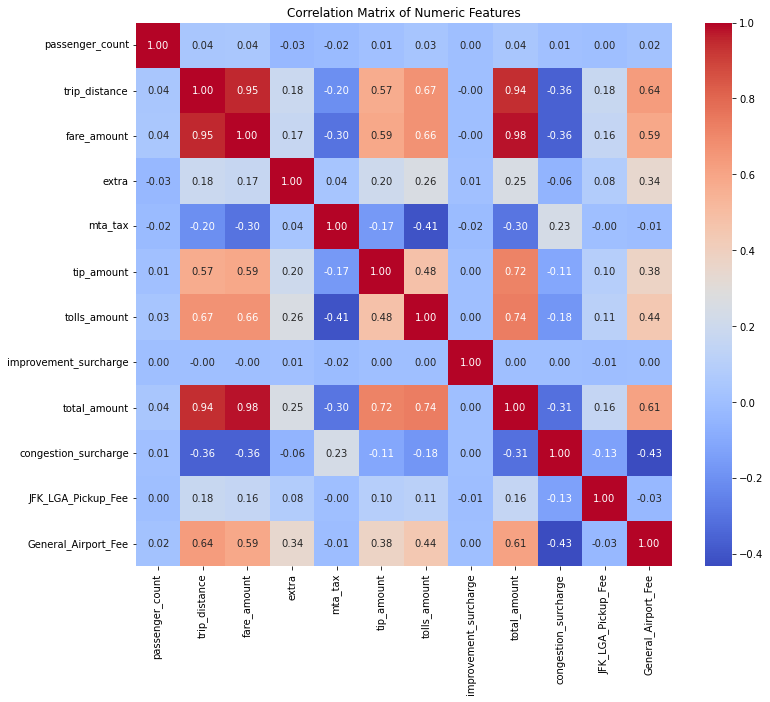

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


When adapting a predictive model from one geographical context (NYC) to another (Tbilisi), several considerations must be taken into account due to differences in urban layout, traffic patterns, fare calculation methods, and regulatory environments. To optimize your model for Tbilisi while basing it on NYC data, it’s crucial to critically evaluate each feature’s relevance and applicability.

### Features to Consider Dropping:

**`tolls_amount`**:
   - **Explanation for Dropping**: In NYC, tolls are a significant factor in fare calculations due to numerous bridges and tunnels. However, if Tbilisi does not have similar toll structures impacting taxi routes, this feature may not be relevant. Including a variable that is not applicable to the local context could introduce noise and lead to misinterpretations in the model's predictive accuracy.

**`improvement_surcharge` **:
   - **Explanation for Dropping**: The improvement surcharge is a specific fee added to every taxi trip in NYC, intended to support taxi infrastructure improvements. Unless Tbilisi has a similar surcharge, this feature would not be applicable and should be removed to avoid inaccuracies in the model developed for Tbilisi.

 **`congestion_surcharge`**:
   - **Explanation for Dropping**: The congestion surcharge applies to trips in the Manhattan area in NYC, intended to reduce traffic congestion. If Tbilisi does not implement a similar charge in congested zones, this feature could be irrelevant and should be excluded from the model to avoid skewing fare predictions.

### Features to Retain:

- **`trip_distance`**: Distance is a universal factor in fare calculations and should be retained, assuming distance affects fares similarly in Tbilisi.
- **`fare_amount`**: As the target variable, assuming you aim to predict the fare directly.
- **`passenger_count`**: Might influence fare structuring if Tbilisi taxis have fare adjustments based on passenger numbers.

### Additional Feature Considerations:

- **Datetime Features**: Time-related features extracted from `tpep_pickup_datetime` and `tpep_dropoff_datetime`, such as time of day or day of the week, might remain relevant if traffic patterns and fare rates in Tbilisi are influenced by time variables similar to NYC.

### Conclusion:

When adapting a model to a new context, it is critical to ensure that all features included in the analysis are applicable to that specific environment. This ensures the model’s relevance and accuracy. For each feature considered for removal, the primary justification revolves around the lack of direct applicability or relevance to the taxi fare structure and regulatory environment in Tbilisi. It is also essential to engage with local stakeholders or perform preliminary data explorations to understand better which NYC features may have counterparts in Tbilisi or if new features specific to Tbilisi should be collected and included.


In [54]:

# Dropping features not relevant to Tbilisi's context
features_to_drop = ['tolls_amount', 'improvement_surcharge', 'congestion_surcharge','mta_tax']
df = df.drop(columns=features_to_drop)


In [55]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,distance_bins
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1,1.10,1.00,N,43,237,1,7.90,1.00,4.00,16.90,0.00,0.00,1-2 miles
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1,2.51,1.00,N,48,238,1,14.90,1.00,15.00,34.90,0.00,0.00,2-5 miles
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1,1.43,1.00,N,107,79,1,11.40,1.00,3.28,19.68,0.00,0.00,1-2 miles
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1,1.84,1.00,N,161,137,1,12.80,1.00,10.00,27.80,0.00,0.00,1-2 miles
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1,1.66,1.00,N,239,143,1,12.10,1.00,3.42,20.52,0.00,0.00,1-2 miles


## Categorical Feature Selection

Vendors are private individuals in georgia so we are not interested in how they affect fare amounts. RatecodeID is specific to NYC as well and cannot be reapplied to other geographical locations and store and fwd flag is also a irrelavant for our analysis.

In [56]:
# Dropping irrelevant categorical features for the Tbilisi model
features_to_drop = ['VendorID', 'RatecodeID', 'store_and_fwd_flag']
df = df.drop(columns=features_to_drop)

# Check the modified DataFrame
print(df.head())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
1  2023-01-01 00:55:08   2023-01-01 01:01:27                1           1.10   
2  2023-01-01 00:25:04   2023-01-01 00:37:49                1           2.51   
4  2023-01-01 00:10:29   2023-01-01 00:21:19                1           1.43   
5  2023-01-01 00:50:34   2023-01-01 01:02:52                1           1.84   
6  2023-01-01 00:09:22   2023-01-01 00:19:49                1           1.66   

  PULocationID DOLocationID payment_type  fare_amount  extra  tip_amount  \
1           43          237            1         7.90   1.00        4.00   
2           48          238            1        14.90   1.00       15.00   
4          107           79            1        11.40   1.00        3.28   
5          161          137            1        12.80   1.00       10.00   
6          239          143            1        12.10   1.00        3.42   

   total_amount  JFK_LGA_Pickup_Fee  General_Airport_Fee dista

### Results

In [57]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee
count,28093781,28093781,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00,28093781.00
mean,2023-07-01 05:46:20.028285,2023-07-01 06:06:41.749390,1.40,4.26,22.85,1.68,4.07,32.75,0.01,0.17
min,2023-01-01 00:00:05,2023-01-01 00:05:44,1.00,1.00,2.00,0.00,0.00,2.20,0.00,0.00
25%,2023-04-01 18:21:12,2023-04-01 18:40:28,1.00,1.50,11.40,0.00,1.26,18.60,0.00,0.00
50%,2023-06-25 02:32:23,2023-06-25 02:47:49,1.00,2.26,16.30,1.00,3.28,23.88,0.00,0.00
75%,2023-10-04 20:39:08,2023-10-04 20:56:30,1.00,4.35,25.40,2.50,5.00,35.00,0.00,0.00
max,2023-12-31 23:55:17,2023-12-31 23:59:56,6.00,50.00,300.00,96.38,984.30,1000.00,1.25,1.75
std,NaN,NaN,0.89,4.82,18.39,1.91,4.32,23.48,0.12,0.51


As we can see there are still some outliers i total amount tip amount extras and trip distance. 

box plots still show some outliers beyond typical trip distances, yet these outliers make sense in the context of your analysis or data characteristics, it's entirely acceptable to keep them. Here are several reasons why keeping such outliers might be justified and beneficial:

1. **Contextual Relevance**: In some cases, outliers are not errors but rather meaningful extremes that are important to include in the analysis. For instance, if longer trip distances are typical during certain events or in specific conditions, they provide valuable insights into behaviors or patterns that could be crucial for understanding the data fully.

2. **Realistic Representation**: Removing all outliers can sometimes result in a dataset that no longer accurately represents real-world scenarios. If long trips are a regular occurrence, even if infrequent, they should be analyzed to maintain the integrity of the dataset.

3. **Impact on Analysis**: If the outliers do not skew the analysis or if the analysis aims to understand phenomena that include these outliers, keeping them is beneficial. For example, if you're modeling taxi demand during special events or holidays when long trips are more common, these data points become crucial.

4. **Statistical Considerations**: Some statistical methods and machine learning models are robust to outliers. In such cases, provided the outliers are valid data points, there's less concern about their impact on the analysis.

5. **Decision Making**: Insights derived from the full range of data, including outliers, can be crucial for decision-making. For instance, understanding the conditions under which unusually long or expensive trips occur could help taxi companies or city planners make informed decisions about pricing, routing, or regulations.


In [58]:
df.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,distance_bins
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1,1.10,43,237,1,7.90,1.00,4.00,16.90,0.00,0.00,1-2 miles


# Storing Cleaned Dataset for model development

In [59]:
df.to_parquet('/Users/md/Desktop/python_project/parquet_files/cleaned_taxi_data_v.1.parquet', index=False)
